In [1]:
#Import necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import DataFrames
playlist = pd.read_csv('playlistdf')
playlist.drop(['Unnamed: 0'], axis=1, inplace=True)
audio = pd.read_csv('dfaudio')
audio.drop(['Unnamed: 0'], axis=1, inplace=True)

### Data Cleaning

In [3]:
#Explore first 5 rows of playlist dataset 
playlist.head()

,artist,artist_id,album,track_name,release_date,popularity,is_explicit,track_id
0,Katy Perry,6jJ0s89eD6GaHleKKya26X,Katy Perry - Teenage Dream: The Complete Confe...,Firework,2012-03-12,72,False,4lCv7b86sLynZbXhfScfm2
1,OneRepublic,5Pwc4xIPtQLFEnJriah9YJ,Dreaming Out Loud,All We Are,2007-01-01,39,False,1Jx69b09LKTuBQxkEiFfVX
2,Amy Winehouse,6Q192DXotxtaysaqNPy5yR,Back To Black,Wake Up Alone,2006-01-01,0,False,4u83mwF5tUuWlXS86UOXdu
3,The Script,3AQRLZ9PuTAozP28Skbq8V,The Script,The Man Who Can't Be Moved,2008-09-08,57,False,4Musyaro0NM5Awx8b5c627
4,Adele,4dpARuHxo51G3z768sgnrY,21,Rolling in the Deep,2011-01-19,55,False,1CkvWZme3pRgbzaxZnTl5X


In [4]:
#Explore first 5 rows of audio dataset 
audio.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.638,0.826,8,-4.968,1,0.0479,0.1390,0.000000,0.0803,0.649,124.072,audio_features,4lCv7b86sLynZbXhfScfm2,spotify:track:4lCv7b86sLynZbXhfScfm2,https://api.spotify.com/v1/tracks/4lCv7b86sLyn...,https://api.spotify.com/v1/audio-analysis/4lCv...,227880,4
1,0.397,0.817,2,-5.495,1,0.0420,0.0966,0.000008,0.3160,0.416,158.004,audio_features,1Jx69b09LKTuBQxkEiFfVX,spotify:track:1Jx69b09LKTuBQxkEiFfVX,https://api.spotify.com/v1/tracks/1Jx69b09LKTu...,https://api.spotify.com/v1/audio-analysis/1Jx6...,266227,4
2,0.384,0.527,11,-5.294,0,0.0269,0.5420,0.000000,0.1560,0.222,100.730,audio_features,4u83mwF5tUuWlXS86UOXdu,spotify:track:4u83mwF5tUuWlXS86UOXdu,https://api.spotify.com/v1/tracks/4u83mwF5tUuW...,https://api.spotify.com/v1/audio-analysis/4u83...,221200,3
3,0.609,0.629,10,-5.024,1,0.0264,0.4250,0.000000,0.0978,0.325,99.955,audio_features,4Musyaro0NM5Awx8b5c627,spotify:track:4Musyaro0NM5Awx8b5c627,https://api.spotify.com/v1/tracks/4Musyaro0NM5...,https://api.spotify.com/v1/audio-analysis/4Mus...,241467,4
4,0.729,0.756,8,-5.119,1,0.0294,0.1310,0.000000,0.0527,0.522,104.945,audio_features,1CkvWZme3pRgbzaxZnTl5X,spotify:track:1CkvWZme3pRgbzaxZnTl5X,https://api.spotify.com/v1/tracks/1CkvWZme3pRg...,https://api.spotify.com/v1/audio-analysis/1Ckv...,228293,4


In [5]:
#Rename audio's 'id' column to 'track_id'
audio = audio.rename({'id': 'track_id'}, axis=1) 

In [6]:
audio.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,track_id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.638,0.826,8,-4.968,1,0.0479,0.1390,0.000000,0.0803,0.649,124.072,audio_features,4lCv7b86sLynZbXhfScfm2,spotify:track:4lCv7b86sLynZbXhfScfm2,https://api.spotify.com/v1/tracks/4lCv7b86sLyn...,https://api.spotify.com/v1/audio-analysis/4lCv...,227880,4
1,0.397,0.817,2,-5.495,1,0.0420,0.0966,0.000008,0.3160,0.416,158.004,audio_features,1Jx69b09LKTuBQxkEiFfVX,spotify:track:1Jx69b09LKTuBQxkEiFfVX,https://api.spotify.com/v1/tracks/1Jx69b09LKTu...,https://api.spotify.com/v1/audio-analysis/1Jx6...,266227,4
2,0.384,0.527,11,-5.294,0,0.0269,0.5420,0.000000,0.1560,0.222,100.730,audio_features,4u83mwF5tUuWlXS86UOXdu,spotify:track:4u83mwF5tUuWlXS86UOXdu,https://api.spotify.com/v1/tracks/4u83mwF5tUuW...,https://api.spotify.com/v1/audio-analysis/4u83...,221200,3
3,0.609,0.629,10,-5.024,1,0.0264,0.4250,0.000000,0.0978,0.325,99.955,audio_features,4Musyaro0NM5Awx8b5c627,spotify:track:4Musyaro0NM5Awx8b5c627,https://api.spotify.com/v1/tracks/4Musyaro0NM5...,https://api.spotify.com/v1/audio-analysis/4Mus...,241467,4
4,0.729,0.756,8,-5.119,1,0.0294,0.1310,0.000000,0.0527,0.522,104.945,audio_features,1CkvWZme3pRgbzaxZnTl5X,spotify:track:1CkvWZme3pRgbzaxZnTl5X,https://api.spotify.com/v1/tracks/1CkvWZme3pRg...,https://api.spotify.com/v1/audio-analysis/1Ckv...,228293,4


In [7]:
#Merge playlist and audio dataframes for easier reference.
df = pd.merge(playlist, audio, on='track_id', how='inner')

In [8]:
#Explore new dataframe 
df.head()

,artist,artist_id,album,track_name,release_date,popularity,is_explicit,track_id,danceability,energy,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,Katy Perry,6jJ0s89eD6GaHleKKya26X,Katy Perry - Teenage Dream: The Complete Confe...,Firework,2012-03-12,72,False,4lCv7b86sLynZbXhfScfm2,0.638,0.826,...,0.000000,0.0803,0.649,124.072,audio_features,spotify:track:4lCv7b86sLynZbXhfScfm2,https://api.spotify.com/v1/tracks/4lCv7b86sLyn...,https://api.spotify.com/v1/audio-analysis/4lCv...,227880,4
1,OneRepublic,5Pwc4xIPtQLFEnJriah9YJ,Dreaming Out Loud,All We Are,2007-01-01,39,False,1Jx69b09LKTuBQxkEiFfVX,0.397,0.817,...,0.000008,0.3160,0.416,158.004,audio_features,spotify:track:1Jx69b09LKTuBQxkEiFfVX,https://api.spotify.com/v1/tracks/1Jx69b09LKTu...,https://api.spotify.com/v1/audio-analysis/1Jx6...,266227,4
2,Amy Winehouse,6Q192DXotxtaysaqNPy5yR,Back To Black,Wake Up Alone,2006-01-01,0,False,4u83mwF5tUuWlXS86UOXdu,0.384,0.527,...,0.000000,0.1560,0.222,100.730,audio_features,spotify:track:4u83mwF5tUuWlXS86UOXdu,https://api.spotify.com/v1/tracks/4u83mwF5tUuW...,https://api.spotify.com/v1/audio-analysis/4u83...,221200,3
3,The Script,3AQRLZ9PuTAozP28Skbq8V,The Script,The Man Who Can't Be Moved,2008-09-08,57,False,4Musyaro0NM5Awx8b5c627,0.609,0.629,...,0.000000,0.0978,0.325,99.955,audio_features,spotify:track:4Musyaro0NM5Awx8b5c627,https://api.spotify.com/v1/tracks/4Musyaro0NM5...,https://api.spotify.com/v1/audio-analysis/4Mus...,241467,4
4,Adele,4dpARuHxo51G3z768sgnrY,21,Rolling in the Deep,2011-01-19,55,False,1CkvWZme3pRgbzaxZnTl5X,0.729,0.756,...,0.000000,0.0527,0.522,104.945,audio_features,spotify:track:1CkvWZme3pRgbzaxZnTl5X,https://api.spotify.com/v1/tracks/1CkvWZme3pRg...,https://api.spotify.com/v1/audio-analysis/1Ckv...,228293,4


In [9]:
#Look at the shape of the dataset 
df.shape

(10003, 25)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10003 entries, 0 to 10002
Data columns (total 25 columns):
artist              10003 non-null object
artist_id           10003 non-null object
album               10003 non-null object
track_name          10003 non-null object
release_date        10003 non-null object
popularity          10003 non-null int64
is_explicit         10003 non-null bool
track_id            10003 non-null object
danceability        10003 non-null float64
energy              10003 non-null float64
key                 10003 non-null int64
loudness            10003 non-null float64
mode                10003 non-null int64
speechiness         10003 non-null float64
acousticness        10003 non-null float64
instrumentalness    10003 non-null float64
liveness            10003 non-null float64
valence             10003 non-null float64
tempo               10003 non-null float64
type                10003 non-null object
uri                 10003 non-null object
track

In [11]:
#Turn release_date into a Datetime object 
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y/%m/%d')

In [12]:
#Print the value counts of the 'is_explicit' variable 
df['is_explicit'].value_counts()

False    9000
True     1003
Name: is_explicit, dtype: int64

In [13]:
#Convert "is_explicit" to a variable that is equal to 1 if True, 0 if False
df['is_explicit'] = df['is_explicit'].astype(int)

In [14]:
#Print the value counts to ensure they are the same as before 
df['is_explicit'].value_counts()

0    9000
1    1003
Name: is_explicit, dtype: int64

In [15]:
#Drop unncessary columns 
df = df.drop(['type', 'uri', 'analysis_url', 'time_signature', 'track_href'], axis=1)

In [16]:
#Explore the value counts of popularity 
df['popularity'].value_counts()

0     2954
44     157
42     155
43     154
40     144
      ... 
82      10
83       4
84       3
85       3
86       1
Name: popularity, Length: 87, dtype: int64

We see many songs that have a popularity of 0 which either means a) the popularity is not known or b) the song is quite old (according to the Spotify API documentation, popularity is indicated by play counts, and older songs may be played less). Therefore, these songs could skew our popularity results as they influence the scale of our popularity variable.

In [17]:
#Remove any popularity values that are equal to 0
df['popularity'] = df['popularity'][df['popularity'] != 0]

In [18]:
#Check for NA values 
df.isna().sum()

artist                 0
artist_id              0
album                  0
track_name             0
release_date           0
popularity          2954
is_explicit            0
track_id               0
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
duration_ms            0
dtype: int64

In [19]:
#Drop NA values 
df.dropna(inplace=True)

In [20]:
#Check the value counts again
df['popularity'].value_counts()

44.0    157
42.0    155
43.0    154
40.0    144
41.0    143
       ... 
82.0     10
83.0      4
85.0      3
84.0      3
86.0      1
Name: popularity, Length: 86, dtype: int64

In [21]:
#Look at the. describe function to determine the distribution of the ratings 
df['popularity'].describe()

count    7049.000000
mean       43.066818
std        18.454624
min         1.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        86.000000
Name: popularity, dtype: float64

In [22]:
df.head()

,artist,artist_id,album,track_name,release_date,popularity,is_explicit,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Katy Perry,6jJ0s89eD6GaHleKKya26X,Katy Perry - Teenage Dream: The Complete Confe...,Firework,2012-03-12,72.0,0,4lCv7b86sLynZbXhfScfm2,0.638,0.826,8,-4.968,1,0.0479,0.1390,0.000000,0.0803,0.649,124.072,227880
1,OneRepublic,5Pwc4xIPtQLFEnJriah9YJ,Dreaming Out Loud,All We Are,2007-01-01,39.0,0,1Jx69b09LKTuBQxkEiFfVX,0.397,0.817,2,-5.495,1,0.0420,0.0966,0.000008,0.3160,0.416,158.004,266227
3,The Script,3AQRLZ9PuTAozP28Skbq8V,The Script,The Man Who Can't Be Moved,2008-09-08,57.0,0,4Musyaro0NM5Awx8b5c627,0.609,0.629,10,-5.024,1,0.0264,0.4250,0.000000,0.0978,0.325,99.955,241467
4,Adele,4dpARuHxo51G3z768sgnrY,21,Rolling in the Deep,2011-01-19,55.0,0,1CkvWZme3pRgbzaxZnTl5X,0.729,0.756,8,-5.119,1,0.0294,0.1310,0.000000,0.0527,0.522,104.945,228293
5,Bruno Mars,0du5cEVh5yTK9QJze8zA0C,Doo-Wops & Hooligans,Grenade,2010-10-05,75.0,0,4lLtanYk6tkMvooU0tWzG8,0.706,0.558,2,-7.237,0,0.0593,0.1460,0.000000,0.1180,0.227,110.443,223253


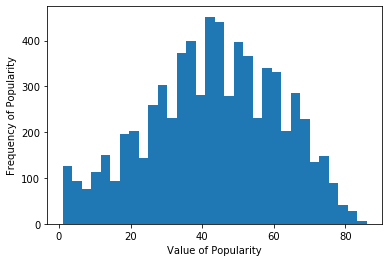

In [23]:
#Plot a histogram of the frequency of certain popularity values
plt.hist(df['popularity'],bins='auto')
plt.xlabel('Value of Popularity')
plt.ylabel('Frequency of Popularity')
plt.show()

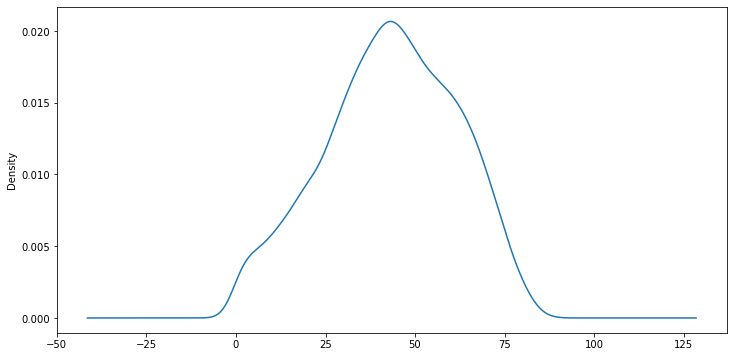

In [24]:
df['popularity'].plot(kind='kde', figsize = (12,6))
plt.show()

In [25]:
#Create a binned variable for popularity as a proxy for our ratings
df['ratings'] = df['popularity'].apply(lambda x: 1 if x <= 20 
                                       else 2 if x>= 21 and x<40 
                                       else 3 if x>=40 and x<60
                                       else 4 if x>=60 and x<80 
                                       else 5)

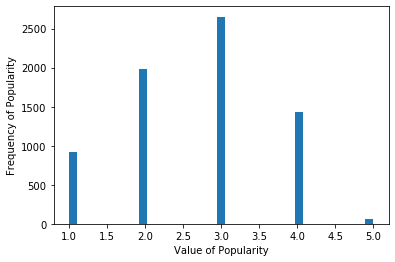

In [26]:
#Plot a histogram of the frequency of certain popularity values
plt.hist(df['ratings'],bins='auto')
plt.xlabel('Value of Popularity')
plt.ylabel('Frequency of Popularity')
plt.show()

## Data Exploration

/Users/adinasteinman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


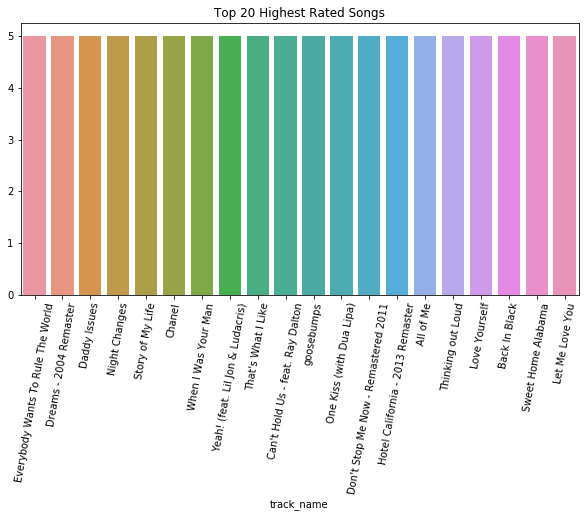

In [27]:
#Plot the top 20 highest rated songs using our new 'ratings' proxy 
plt.figure(figsize=(10,5))
topsongs = df.groupby('track_name').mean()['ratings'].sort_values(ascending=False).head(20)
sns.barplot(topsongs.index, topsongs.values)
plt.title('Top 20 Highest Rated Songs')
plt.xticks(rotation=80);

/Users/adinasteinman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


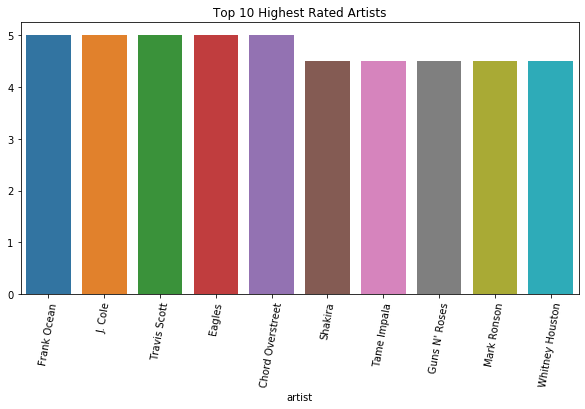

In [28]:
#Plot the top 10 highest rated artists 
plt.figure(figsize=(10,5))
topartists = df.groupby('artist').mean()['ratings'].sort_values(ascending=False).head(10)
sns.barplot(topartists.index, topartists.values)
plt.title('Top 10 Highest Rated Artists')
plt.xticks(rotation=80);

/Users/adinasteinman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


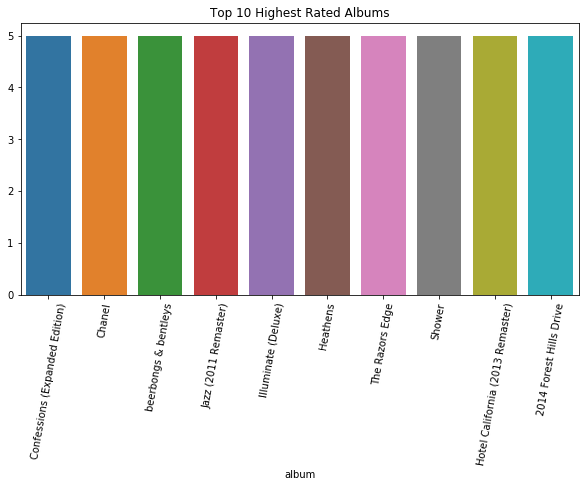

In [29]:
#Plot the top 10 highest rated albums
plt.figure(figsize=(10,5))
topalbums = df.groupby('album').mean()['ratings'].sort_values(ascending=False).head(10)
sns.barplot(topalbums.index, topalbums.values)
plt.title('Top 10 Highest Rated Albums')
plt.xticks(rotation=80);

Next we will look at correlation and determine if any explanatory variablesa re strongly correlated with our target variable, ratings.

In [30]:
df = df.drop(['popularity'], axis=1)

In [31]:
#Look at correlation of entire dataframe
df.corr()

,is_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,ratings
is_explicit,1.000000,0.153941,0.018739,0.025473,0.075580,-0.065023,0.282102,-0.064637,-0.053978,0.012710,-0.011602,-0.001534,-0.010577,0.015288
danceability,0.153941,1.000000,0.101720,0.016043,0.108697,-0.085983,0.113093,-0.154350,-0.040156,-0.103807,0.434229,-0.198818,-0.116565,0.028706
energy,0.018739,0.101720,1.000000,0.034811,0.747410,-0.083730,0.103211,-0.709115,-0.058038,0.174602,0.378527,0.147449,-0.027132,0.006866
key,0.025473,0.016043,0.034811,1.000000,0.021872,-0.137305,0.045716,-0.027442,-0.008240,-0.003697,0.036907,0.007837,0.010963,0.011466
loudness,0.075580,0.108697,0.747410,0.021872,1.000000,-0.092319,0.072798,-0.563486,-0.198448,0.103059,0.196846,0.088760,-0.083880,0.006043
mode,-0.065023,-0.085983,-0.083730,-0.137305,-0.092319,1.000000,-0.088416,0.090889,-0.015483,-0.029159,-0.016828,-0.000115,-0.000568,0.008099
speechiness,0.282102,0.113093,0.103211,0.045716,0.072798,-0.088416,1.000000,-0.043120,-0.059540,0.094230,0.063768,0.063007,-0.066059,-0.006740
acousticness,-0.064637,-0.154350,-0.709115,-0.027442,-0.563486,0.090889,-0.043120,1.000000,0.046793,-0.101782,-0.237506,-0.113900,-0.042362,-0.011861
instrumentalness,-0.053978,-0.040156,-0.058038,-0.008240,-0.198448,-0.015483,-0.059540,0.046793,1.000000,-0.021276,-0.089423,0.014141,0.099227,-0.053424
liveness,0.012710,-0.103807,0.174602,-0.003697,0.103059,-0.029159,0.094230,-0.101782,-0.021276,1.000000,0.042332,0.030848,-0.025981,-0.028707


In [32]:
#Look only at correlation with our target variable, 'ratings'
df.corr()['ratings']

is_explicit         0.015288
danceability        0.028706
energy              0.006866
key                 0.011466
loudness            0.006043
mode                0.008099
speechiness        -0.006740
acousticness       -0.011861
instrumentalness   -0.053424
liveness           -0.028707
valence             0.069083
tempo              -0.010410
duration_ms         0.084709
ratings             1.000000
Name: ratings, dtype: float64

I'll also look at variables to see if they are correlated with each other, in order to investigate potential multicollinearity.

In [33]:
#Create new DataFrame which stacks the absolute values of the correlations and sorts them
df2 = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

#Create a 'pairs' column that groups the two variables whose correlations' are being compared
df2['pairs'] = list(zip(df2.level_0, df2.level_1))

#Set this 'pairs' column as the index
df2.set_index(['pairs'], inplace = True)

#Drop the columns level_1 and level_0
df2.drop(columns=['level_1', 'level_0'], inplace = True)

# Create a column 'cc' for correlation coefficient
df2.columns = ['cc']

#Drop dataframe duplicates 
df2.drop_duplicates(inplace=True)

#Display absolute correlations that are greater than 0.70
df2[(df2.cc>.70) & (df2.cc<1)]

,cc
pairs,
"(energy, loudness)",0.747410
"(energy, acousticness)",0.709115


The results are not surprising; it makes sense that the energy of a song would be correlated to how loud it is, since energetic songs are fast, loud and noisy. It also makes sense that energy and acousticness are correlated; songs that are acoustic tend to be slower, and lower energy, and therefore it is reasonable to assume that these two features are correlated.

In [34]:
df.head()

,artist,artist_id,album,track_name,release_date,is_explicit,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,ratings
0,Katy Perry,6jJ0s89eD6GaHleKKya26X,Katy Perry - Teenage Dream: The Complete Confe...,Firework,2012-03-12,0,4lCv7b86sLynZbXhfScfm2,0.638,0.826,8,-4.968,1,0.0479,0.1390,0.000000,0.0803,0.649,124.072,227880,4
1,OneRepublic,5Pwc4xIPtQLFEnJriah9YJ,Dreaming Out Loud,All We Are,2007-01-01,0,1Jx69b09LKTuBQxkEiFfVX,0.397,0.817,2,-5.495,1,0.0420,0.0966,0.000008,0.3160,0.416,158.004,266227,2
3,The Script,3AQRLZ9PuTAozP28Skbq8V,The Script,The Man Who Can't Be Moved,2008-09-08,0,4Musyaro0NM5Awx8b5c627,0.609,0.629,10,-5.024,1,0.0264,0.4250,0.000000,0.0978,0.325,99.955,241467,3
4,Adele,4dpARuHxo51G3z768sgnrY,21,Rolling in the Deep,2011-01-19,0,1CkvWZme3pRgbzaxZnTl5X,0.729,0.756,8,-5.119,1,0.0294,0.1310,0.000000,0.0527,0.522,104.945,228293,3
5,Bruno Mars,0du5cEVh5yTK9QJze8zA0C,Doo-Wops & Hooligans,Grenade,2010-10-05,0,4lLtanYk6tkMvooU0tWzG8,0.706,0.558,2,-7.237,0,0.0593,0.1460,0.000000,0.1180,0.227,110.443,223253,4


For our classification problem, we will look at how certain audio features can predict a song's rating. Therefore, to proceed with this analysis, we will build a new DataFrame that only consists of these features and will drop the remaining.


In [35]:
audio = df.drop(['artist', 'artist_id', 'album', 'track_name'], axis=1)

In [36]:
audio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7049 entries, 0 to 10002
Data columns (total 16 columns):
release_date        7049 non-null datetime64[ns]
is_explicit         7049 non-null int64
track_id            7049 non-null object
danceability        7049 non-null float64
energy              7049 non-null float64
key                 7049 non-null int64
loudness            7049 non-null float64
mode                7049 non-null int64
speechiness         7049 non-null float64
acousticness        7049 non-null float64
instrumentalness    7049 non-null float64
liveness            7049 non-null float64
valence             7049 non-null float64
tempo               7049 non-null float64
duration_ms         7049 non-null int64
ratings             7049 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(5), object(1)
memory usage: 936.2+ KB


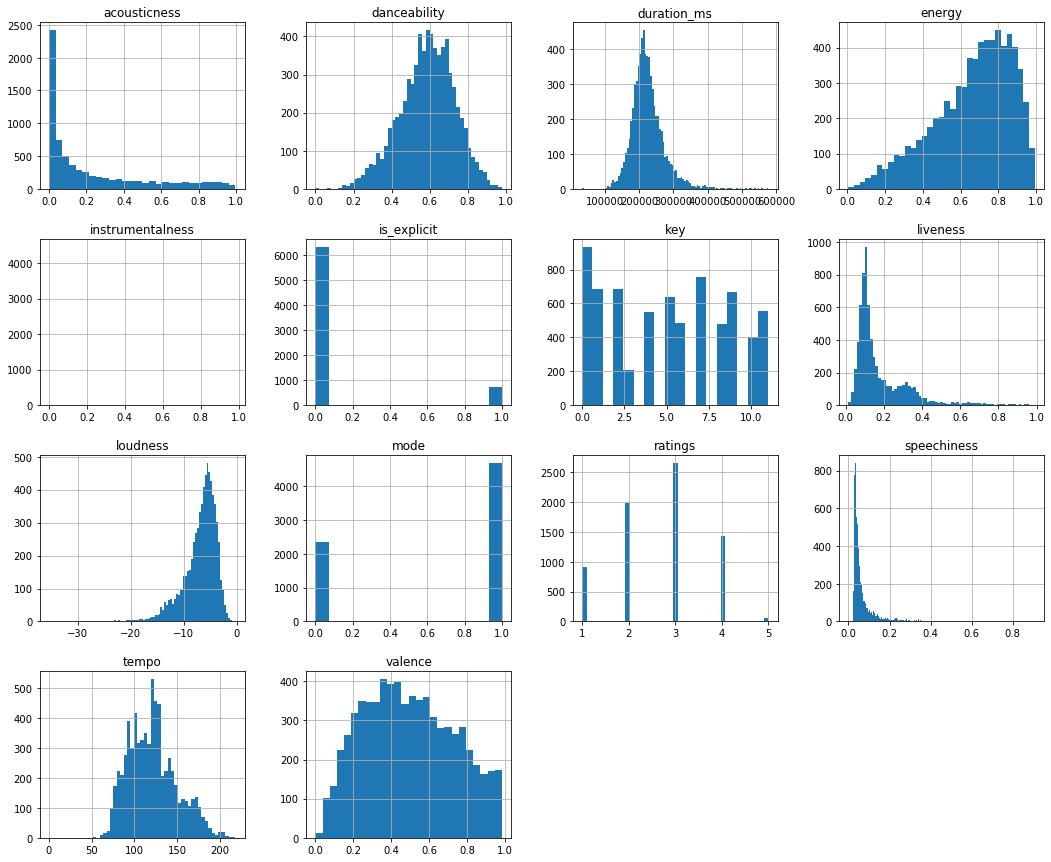

In [37]:
#First, let's plot a histogram for each column to preview their distrubtions 
audio.hist(figsize=(18,15), bins='auto');

## Feature Engineering

In [38]:
audio['release_date'].value_counts()

2013-01-01    118
2010-02-26     92
2012-01-01     88
2018-04-10     79
2016-09-09     70
             ... 
2012-09-24      1
1999-01-12      1
1983-01-18      1
2008-05-19      1
1970-01-01      1
Name: release_date, Length: 1668, dtype: int64

In [39]:
audio['year']=pd.to_datetime(audio['release_date'], format='%m/%d/%Y').dt.year

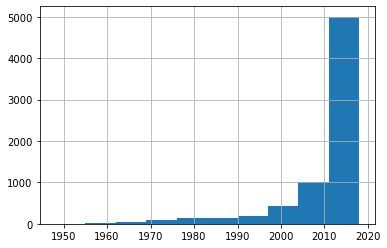

In [40]:
audio['year'].hist()

In [41]:
audio['year'].nunique()

64

Since the goal is to determine if the year that the song is from impacts the song rating, with 64 years, it may be difficult to see if one specific year has an impact vs. another, since there are 64 unique years in our dataset. As a result, we will first transform the 'year' feature into a 'decade' feature, and then will turn this decade feature into a categorical variable to determine its impact on song ratings.

In [42]:
#adding a new feature "decade" that breaks down songs that are from the 2010s, 2000s, etc.
#if the song is from a decade it will be assigned the first year of that decade
#i.e. if a song is from 1975, the decade variable will have the variable as "1970", as in from the 1970s
audio['decade'] = audio['year'].apply(lambda x: 1950 if x<1960 
                                        else 1960 if x>=1960 and x<1970 
                                        else 1970 if x>=1970 and x<1980
                                        else 1980 if x>=1980 and x<1990
                                        else 1990 if x>=1990 and x<2000
                                        else 2000 if x>=2000 and x<2010
                                        else 2010)

In [43]:
#Drop year as it was only used to generate the decade variable
audio = audio.drop(['year'], axis=1)

In [44]:
#Display 5 rows of audio again
audio.head()

,release_date,is_explicit,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,ratings,decade
0,2012-03-12,0,4lCv7b86sLynZbXhfScfm2,0.638,0.826,8,-4.968,1,0.0479,0.1390,0.000000,0.0803,0.649,124.072,227880,4,2010
1,2007-01-01,0,1Jx69b09LKTuBQxkEiFfVX,0.397,0.817,2,-5.495,1,0.0420,0.0966,0.000008,0.3160,0.416,158.004,266227,2,2000
3,2008-09-08,0,4Musyaro0NM5Awx8b5c627,0.609,0.629,10,-5.024,1,0.0264,0.4250,0.000000,0.0978,0.325,99.955,241467,3,2000
4,2011-01-19,0,1CkvWZme3pRgbzaxZnTl5X,0.729,0.756,8,-5.119,1,0.0294,0.1310,0.000000,0.0527,0.522,104.945,228293,3,2010
5,2010-10-05,0,4lLtanYk6tkMvooU0tWzG8,0.706,0.558,2,-7.237,0,0.0593,0.1460,0.000000,0.1180,0.227,110.443,223253,4,2010


In [45]:
#Turn the decade variable into a dummy variable

df_new = audio['decade']
df_new = pd.get_dummies(df_new, drop_first=True, prefix='decade')

In [46]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7049 entries, 0 to 10002
Data columns (total 6 columns):
decade_1960    7049 non-null uint8
decade_1970    7049 non-null uint8
decade_1980    7049 non-null uint8
decade_1990    7049 non-null uint8
decade_2000    7049 non-null uint8
decade_2010    7049 non-null uint8
dtypes: uint8(6)
memory usage: 96.4 KB


In [47]:
df = pd.concat([audio, df_new], axis=1, join='inner')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7049 entries, 0 to 10002
Data columns (total 23 columns):
release_date        7049 non-null datetime64[ns]
is_explicit         7049 non-null int64
track_id            7049 non-null object
danceability        7049 non-null float64
energy              7049 non-null float64
key                 7049 non-null int64
loudness            7049 non-null float64
mode                7049 non-null int64
speechiness         7049 non-null float64
acousticness        7049 non-null float64
instrumentalness    7049 non-null float64
liveness            7049 non-null float64
valence             7049 non-null float64
tempo               7049 non-null float64
duration_ms         7049 non-null int64
ratings             7049 non-null int64
decade              7049 non-null int64
decade_1960         7049 non-null uint8
decade_1970         7049 non-null uint8
decade_1980         7049 non-null uint8
decade_1990         7049 non-null uint8
decade_2000         7049

In [49]:
df = df.drop(['decade', 'release_date'], axis=1)

In [50]:
df.head()

,is_explicit,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,duration_ms,ratings,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010
0,0,4lCv7b86sLynZbXhfScfm2,0.638,0.826,8,-4.968,1,0.0479,0.1390,0.000000,...,0.649,124.072,227880,4,0,0,0,0,0,1
1,0,1Jx69b09LKTuBQxkEiFfVX,0.397,0.817,2,-5.495,1,0.0420,0.0966,0.000008,...,0.416,158.004,266227,2,0,0,0,0,1,0
3,0,4Musyaro0NM5Awx8b5c627,0.609,0.629,10,-5.024,1,0.0264,0.4250,0.000000,...,0.325,99.955,241467,3,0,0,0,0,1,0
4,0,1CkvWZme3pRgbzaxZnTl5X,0.729,0.756,8,-5.119,1,0.0294,0.1310,0.000000,...,0.522,104.945,228293,3,0,0,0,0,0,1
5,0,4lLtanYk6tkMvooU0tWzG8,0.706,0.558,2,-7.237,0,0.0593,0.1460,0.000000,...,0.227,110.443,223253,4,0,0,0,0,0,1


Additionally, several of the audio features are calculated on the same scale. Acousticness, energy, danceability, instrumentalness, liveness, speechiness, and valence all are measured on a 0-1 scale; the closer to 1, the higher the amount of that feature. Let's quickly confirm this with the df.describe method:

In [60]:
df.describe()

,is_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,ratings,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010
count,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000
mean,0.103277,0.586282,0.664744,5.142148,-6.899442,0.664633,0.069217,0.228519,0.034811,0.183382,0.493359,121.001772,224841.869911,2.678962,0.009789,0.018159,0.031068,0.049369,0.142006,0.747908
std,0.304342,0.143891,0.206011,3.578287,3.145116,0.472152,0.066686,0.277276,0.133673,0.146673,0.236542,28.348167,46916.833570,0.967145,0.098459,0.133534,0.173514,0.216652,0.349081,0.434245
min,0.000000,0.000000,0.005440,0.000000,-35.422000,0.000000,0.000000,0.000005,0.000000,0.015300,0.000000,0.000000,33533.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.495000,0.535000,2.000000,-8.234000,0.000000,0.034400,0.015900,0.000000,0.094000,0.304000,99.910000,196133.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.594000,0.703000,5.000000,-6.175000,1.000000,0.045300,0.095800,0.000009,0.123000,0.478000,119.964000,218893.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.688000,0.828000,8.000000,-4.753000,1.000000,0.071200,0.363000,0.000914,0.231000,0.677000,138.105000,246600.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,0.979000,0.993000,11.000000,-0.276000,1.000000,0.907000,0.995000,0.983000,0.990000,0.982000,218.356000,576747.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now, I would like to take a look at the means of these features across the entire playlist and see how they compare to one another. 

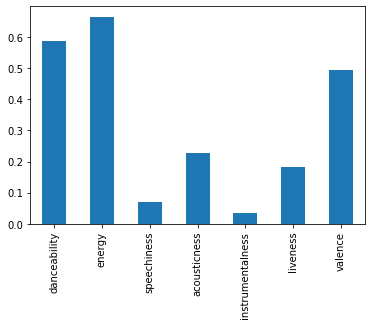

In [63]:
scale = ['danceability', 'energy', 'speechiness', 'acousticness','instrumentalness', 'liveness', 'valence']
df[scale].mean().plot(kind='bar')

We see here that our playlists' attributes are overall songs with high danceability (songs suitable for dancing), high energy (high intensity and noise) and high valence (happy and cheery). It appears that we have a playlist full of fun, happy, dance songs! 